In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-india-movies/IMDb Movies India.csv


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [54]:
df = pd.read_csv('/kaggle/input/imdb-india-movies/IMDb Movies India.csv', encoding='latin1')

In [55]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## 1. Summary of Dataset
This is the dataset of IMDB Indian Movies. There are 10 columns and 15509 rows in this dataset. There are alot missing values in this dataset also duplicated values.

In [56]:
df.shape

(15509, 10)

## 2.  Columns Description
- **Name:** Name of Movie
- **Year:** Year of release of each movie
- **Duration:** Length/Duration of movies
- **Genre:** Genre of Movie. e.g. Drama, Comedy, Romance
- **Rating:** Imdb Ratings
- **Director:** Director name 
- **Actor 1:** Lead Actor of the film
- **Actor 2:** Second Lead Actor Name
- **Actor 3:** Third / Support Actor name

## 3. Issues with the Dataset

1. Dirty Data
    - Duplicate Values in Name Columns `Validate`
    - Missing Values in the all Columns `Completeness`
    - special charachter in the starting of the name column `Accuracy`
    - remove comma from votes columns `Accuracy`
    - bracket in the year column `Accuracy`
    - In duration table there is alpha numeric data
    - There is one movie whose lenght in just 2 min

2. Messy Data
    - Posibily of spiliting Genre list Column into differnet Genres

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [58]:
# Creating a function of calculating missing values percentage

def missing_values_with_percent():
    return pd.DataFrame({
    'Missing Values': df.isna().sum().values,
    'Percentage': ((df.isna().sum()/len(df)) * 100).apply(lambda x: f'{x:.2f}%')
}, index=df.columns)

In [59]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,528,3.40%
Duration,8269,53.32%
Genre,1877,12.10%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


## There are alot of missing values (Inspecting Null Values)

In [60]:
# checking for missing values according to row
df.isnull().sum(axis=1).sort_values(ascending=False)

1920     9
1836     9
3807     9
8669     9
9600     9
        ..
7385     0
7383     0
7380     0
7377     0
15508    0
Length: 15509, dtype: int64

In [61]:
# Dropping the column Actor 2 and Actor 3 Because there are alot missing values in these columns and these column not much effect on ratings
df.drop(['Actor 2', 'Actor 3'], axis=1, inplace=True)

In [62]:
# There are alot duplicate values, we have to resolve this issue too. its an example
df[df['Name'] == 'A Ballad of Maladies']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
135,A Ballad of Maladies,(2016),86 min,"Documentary, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav
136,A Ballad of Maladies,(2016),86 min,"Documentary, History, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav


In [63]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,528,3.40%
Duration,8269,53.32%
Genre,1877,12.10%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%


In [64]:
df.dropna(subset=['Duration'],inplace=True)

In [65]:
# it will keep only those rows who have less the or equal to 5 NaN values
df = df[(df.isnull().sum(axis=1).sort_values(ascending=False) <= 5)]

/tmp/ipykernel_32/3690908795.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(df.isnull().sum(axis=1).sort_values(ascending=False) <= 5)]


In [66]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,125,1.73%
Duration,0,0.00%
Genre,187,2.58%
Rating,1389,19.19%
Votes,1389,19.19%
Director,14,0.19%
Actor 1,264,3.65%


In [67]:
df.dropna(subset=['Rating','Votes'],inplace=True)

In [68]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,31,0.53%
Rating,0,0.00%
Votes,0,0.00%
Director,1,0.02%
Actor 1,75,1.28%


In [69]:
# same process goes with Director Column
df.Director.describe()

count             5850
unique            2549
top       David Dhawan
freq                41
Name: Director, dtype: object

In [70]:
df.groupby('Director').Director.count().sort_values(ascending=False)

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         34
Shakti Samanta          34
Hrishikesh Mukherjee    33
                        ..
Kathir                   1
Kashmira Shah            1
Kashinath                1
Kasam Ali                1
Zunaid Memon             1
Name: Director, Length: 2549, dtype: int64

In [71]:
df['Director'].fillna('David Dhawan',inplace=True)

In [72]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,31,0.53%
Rating,0,0.00%
Votes,0,0.00%
Director,0,0.00%
Actor 1,75,1.28%


In [73]:
# Same thing apply with Actor 1 Column
df['Actor 1'].describe()

count                 5776
unique                2046
top       Amitabh Bachchan
freq                   104
Name: Actor 1, dtype: object

In [74]:
df['Actor 1'].fillna('Amitabh Bachchan', inplace=True)

In [75]:
missing_values_with_percent()

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,0,0.00%
Genre,31,0.53%
Rating,0,0.00%
Votes,0,0.00%
Director,0,0.00%
Actor 1,0,0.00%


In [76]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave


## Now Dealing with Column Accuracy

In [77]:
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)

In [78]:
df['Duration'] = df['Duration'].str.replace(r' min', '', regex=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     5820 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), object(7)
memory usage: 411.4+ KB


### Changing Column Data Type for EDA

In [80]:
df['Year'] = df['Year'].astype('int')
df['Duration'] = df['Duration'].astype('int')

In [81]:
df['Votes'] = df['Votes'].str.replace(',','')

In [82]:
df['Votes'] = df['Votes'].astype('int')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int64  
 2   Duration  5851 non-null   int64  
 3   Genre     5820 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int64  
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 411.4+ KB


In [84]:
df.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


## Exploratory Data Analysis

Text(0.5, 1.0, 'Number of Movies Per Year')

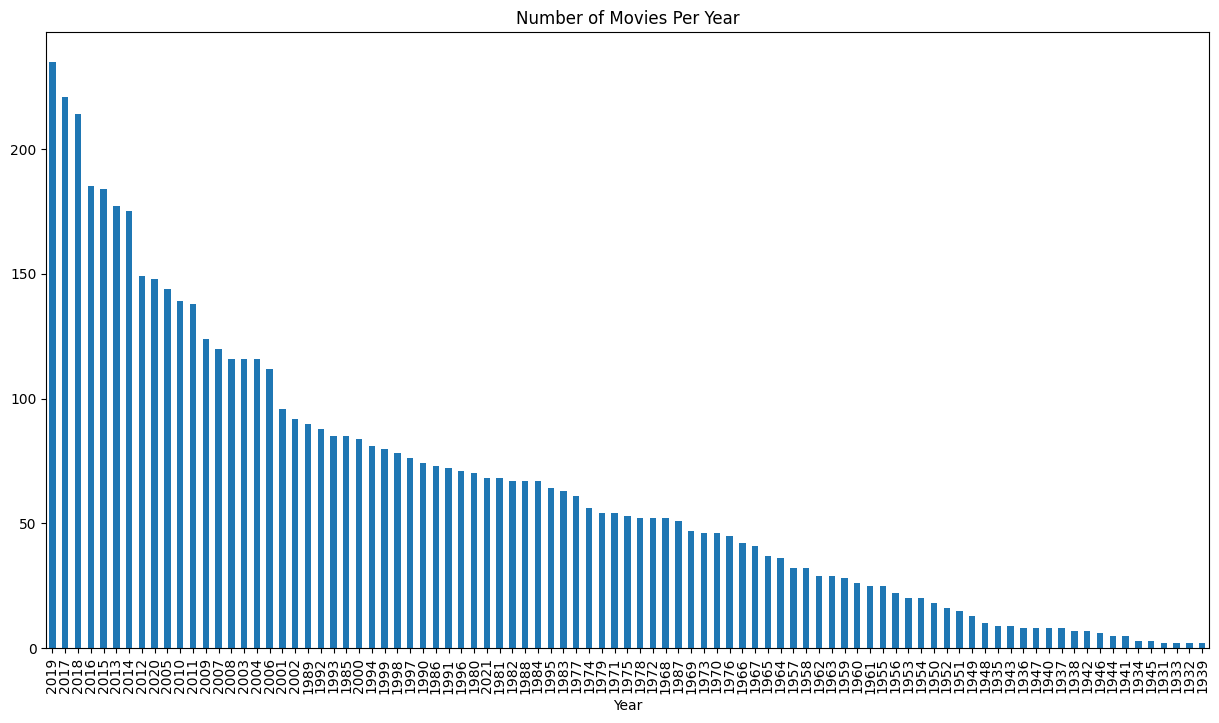

In [85]:
plt.figure(figsize=(15,8))
df['Year'].value_counts().plot(kind='bar')
plt.title('Number of Movies Per Year')

Text(0.5, 1.0, 'Actor with Many Movies')

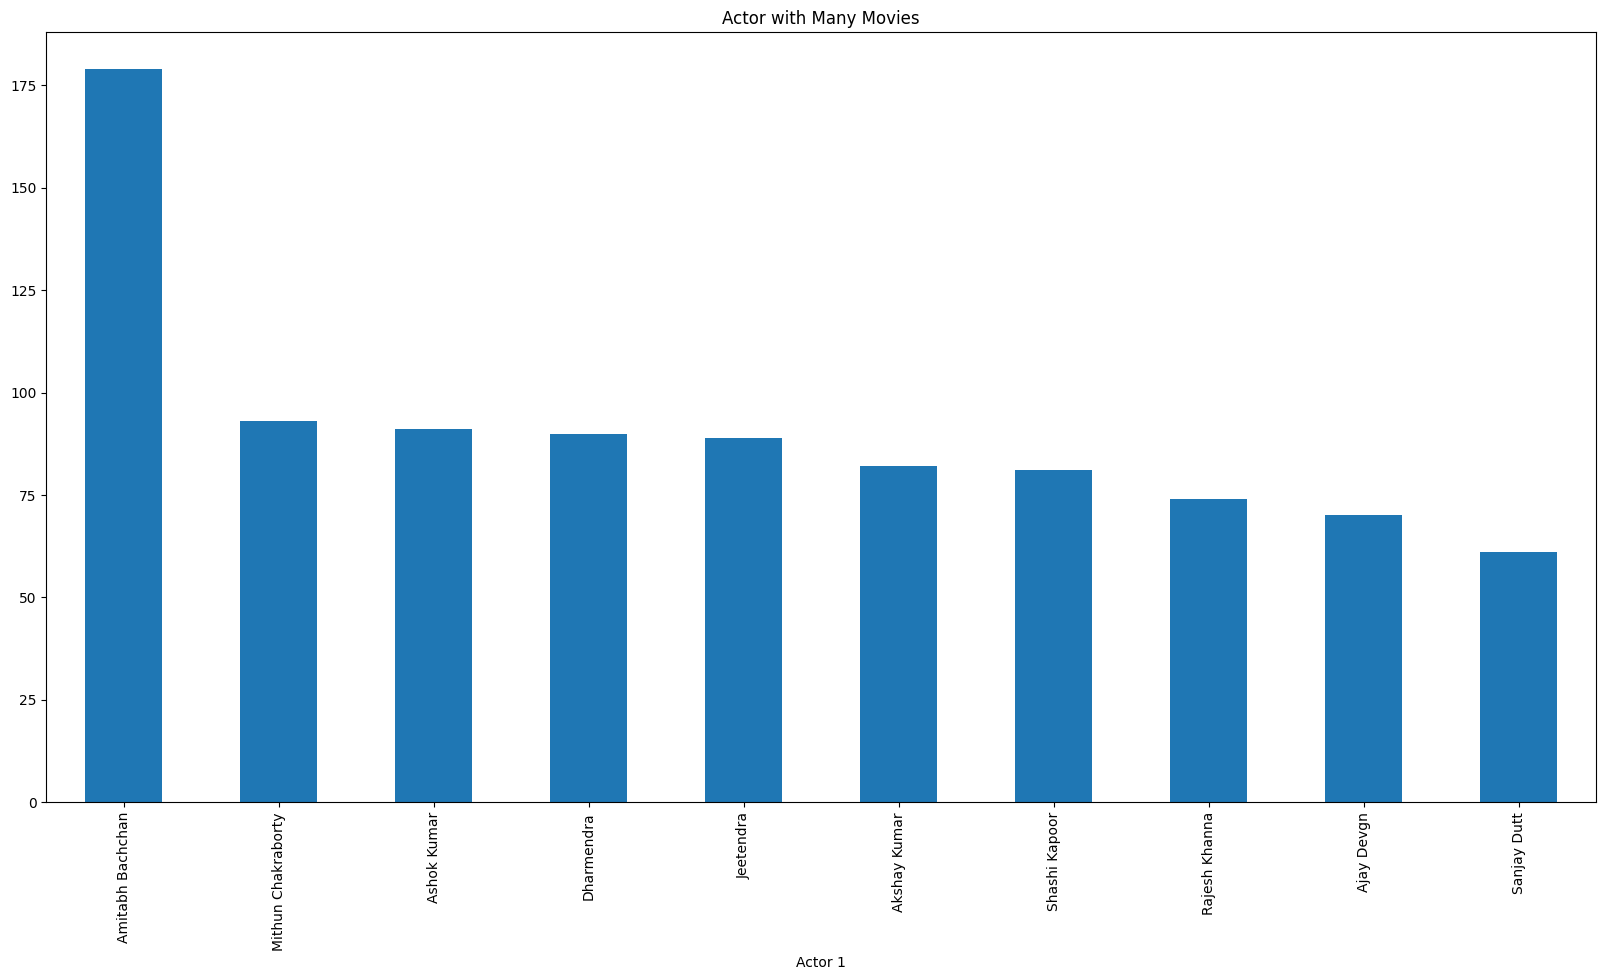

In [86]:
plt.figure(figsize=(20,10))
df['Actor 1'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Actor with Many Movies')

Text(0.5, 1.0, 'Director with most Movies')

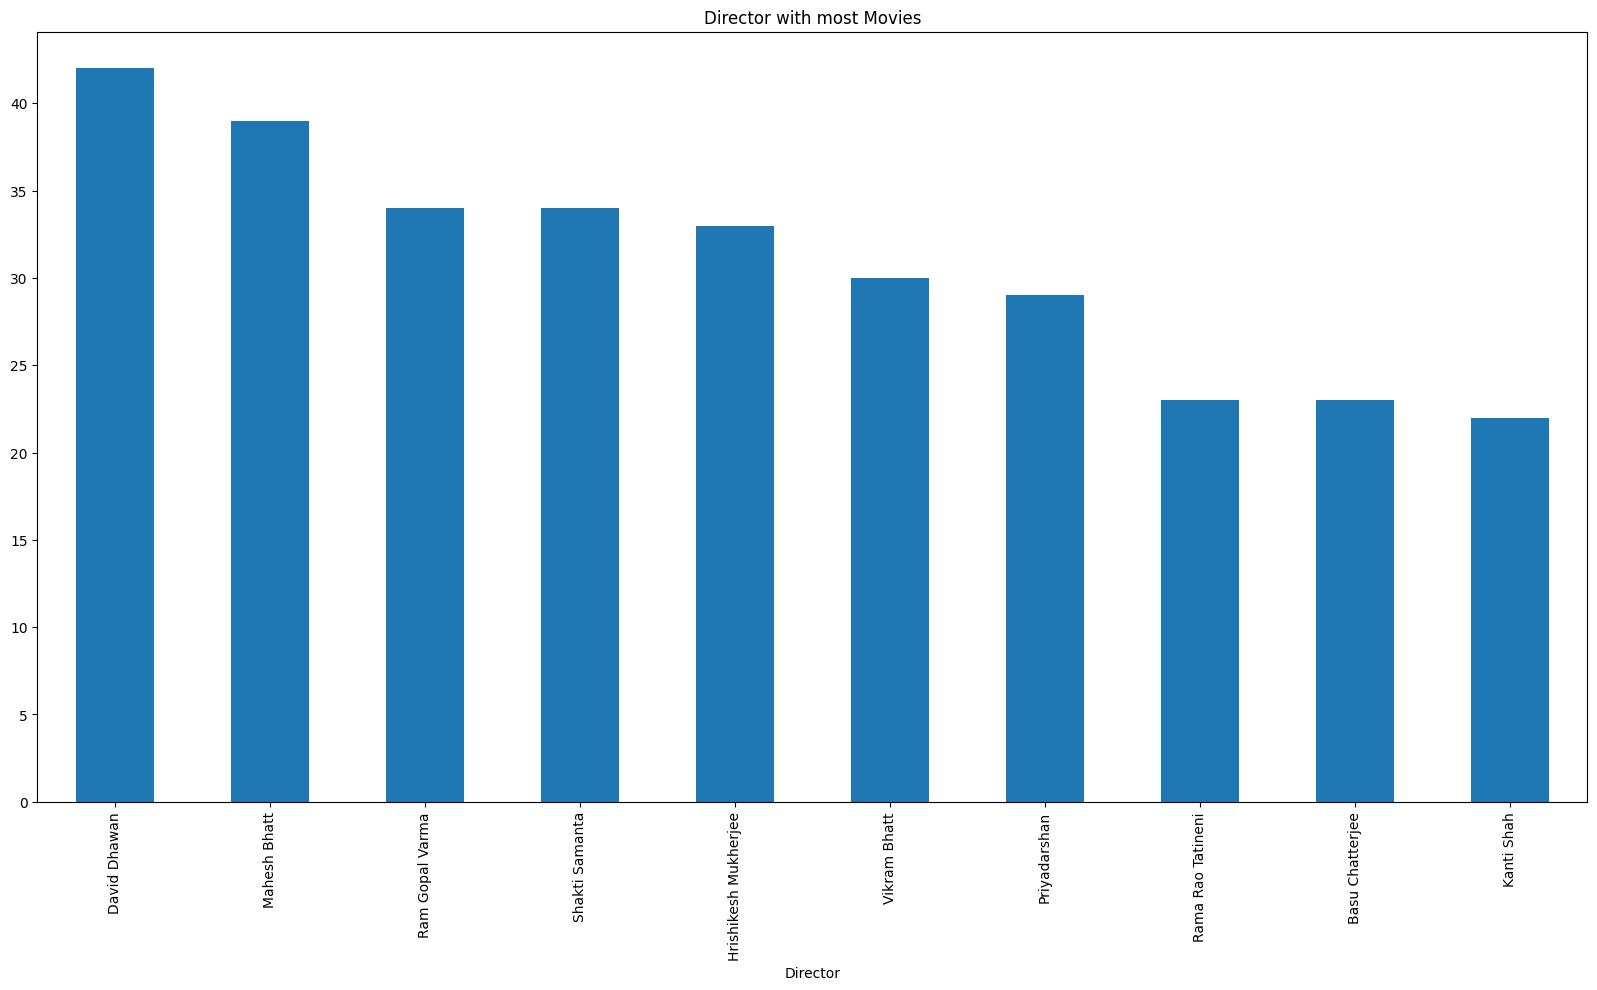

In [87]:
plt.figure(figsize=(20,10))
df['Director'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Director with most Movies')

<Axes: >

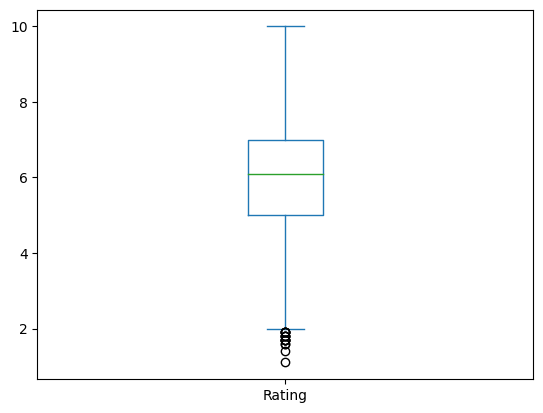

In [ ]:
df['Rating'].plot(kind='box')

In [ ]:
# According to this graph there all alot of outlier in vote column but what can we do for flop movie
df['Votes'].plot(kind='box')

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(df['Rating'], df['Year'], normalize='columns') * 100)

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(df['Rating'], df['Genre'], normalize='columns') * 100)

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(df['Rating'], df['Duration'], normalize='columns') * 100)

## Prepare Data for Model  -> Encoding some Columns

In [ ]:
# Example for encoding 'Genre' based on frequency
genre_counts = df['Genre'].value_counts()
df['Genre_encoded'] = df['Genre'].map(genre_counts)

In [ ]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

In [ ]:
director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

In [ ]:
actor_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor_encoded'] = actor_mean_rating

In [ ]:
df['Genre_mean_rating'].plot(kind='hist')

In [ ]:
# here I applied many encoding techniques but my root mean square error was 1.33 then I decrease to o.71
# which is sufficient

X = df[[ 'Year', 'Votes', 'Duration','Genre_mean_rating','Director_encoded','Actor_encoded']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")